### Instalación de las Librerías

### Tensorflow 

TensorFlow es una biblioteca de código abierto para el aprendizaje automático y las redes neuronales desarrollada por Google. Es ampliamente utilizada para una variedad de tareas de inteligencia artificial, pero es especialmente conocida por su utilidad en el desarrollo de redes neuronales profundas.

Dependemos de Tensorflow para el uso de Tensorflow-I/O

### Tensorflow-I/O 

TensorFlow-IO es una extensión de TensorFlow que proporciona un conjunto de funcionalidades de entrada/salida (I/O) para trabajar con diferentes formatos de datos y sistemas de archivos más allá de los que TensorFlow soporta por defecto. 

Nos permitira utilizar las señales que hemos creado para poder transformarlas a un espectrogrma. 

### Librosa 

Librosa es una biblioteca de Python para analizar y extraer características del audio. Proporciona las herramientas necesarias para abrir, procesar y extraer información de archivos de audio.

Nos permitira extraer los datos y la frecuencia de muestreo que necesitamos de cada uno de los audios que vamos a importar.


In [ ]:
!pip install tensorflow
!pip install tensorflow-io
!pip install librosa

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import IPython.display as ipd
import librosa
import tensorflow as tf
import tensorflow_io as tfio

### Importación de Audios 🎶

In [7]:
#Path de audios
audio_yes_loud = 'Audio/grabados/Yes_fuerte.wav'
audio_yes_quiet = 'Audio/grabados/Yes_bajo.wav'
audio_no_loud = 'Audio/grabados/No_fuerte.wav'
audio_no_quiet = 'Audio/grabados/No_bajo.wav'

Cargamos los audios y los guardamos en 2 variables 

*Array con los datos de la señal , Frecuencia de muestreo*

In [8]:

yes_loud_array, sr_yes_loud = librosa.load(audio_yes_loud)
yes_quiet_array, sr_yes_quiet = librosa.load(audio_yes_quiet)
no_loud_array, sr_no_loud = librosa.load(audio_no_loud)
no_quiet_array, sr_no_quiet = librosa.load(audio_no_quiet)

In [ ]:
#Dimensiones
print(len(yes_loud_array))
print(yes_loud_array.shape, sr_yes_loud)
print(yes_quiet_array.shape, sr_yes_quiet)
print(no_loud_array.shape, sr_no_loud)
print(no_quiet_array.shape, sr_no_quiet)

: 

### Reproduce audio

In [10]:
#Reproduce audio Yes alto
ipd.Audio(audio_yes_loud)

In [11]:
#Reproduce audio Yes bajo
ipd.Audio(audio_yes_quiet)

In [12]:
#Reproduce audio No alto
ipd.Audio(audio_no_loud)

In [13]:
#Reproduce audio No bajo
ipd.Audio(audio_no_quiet)

### Visualizar señales de Audio 🎶

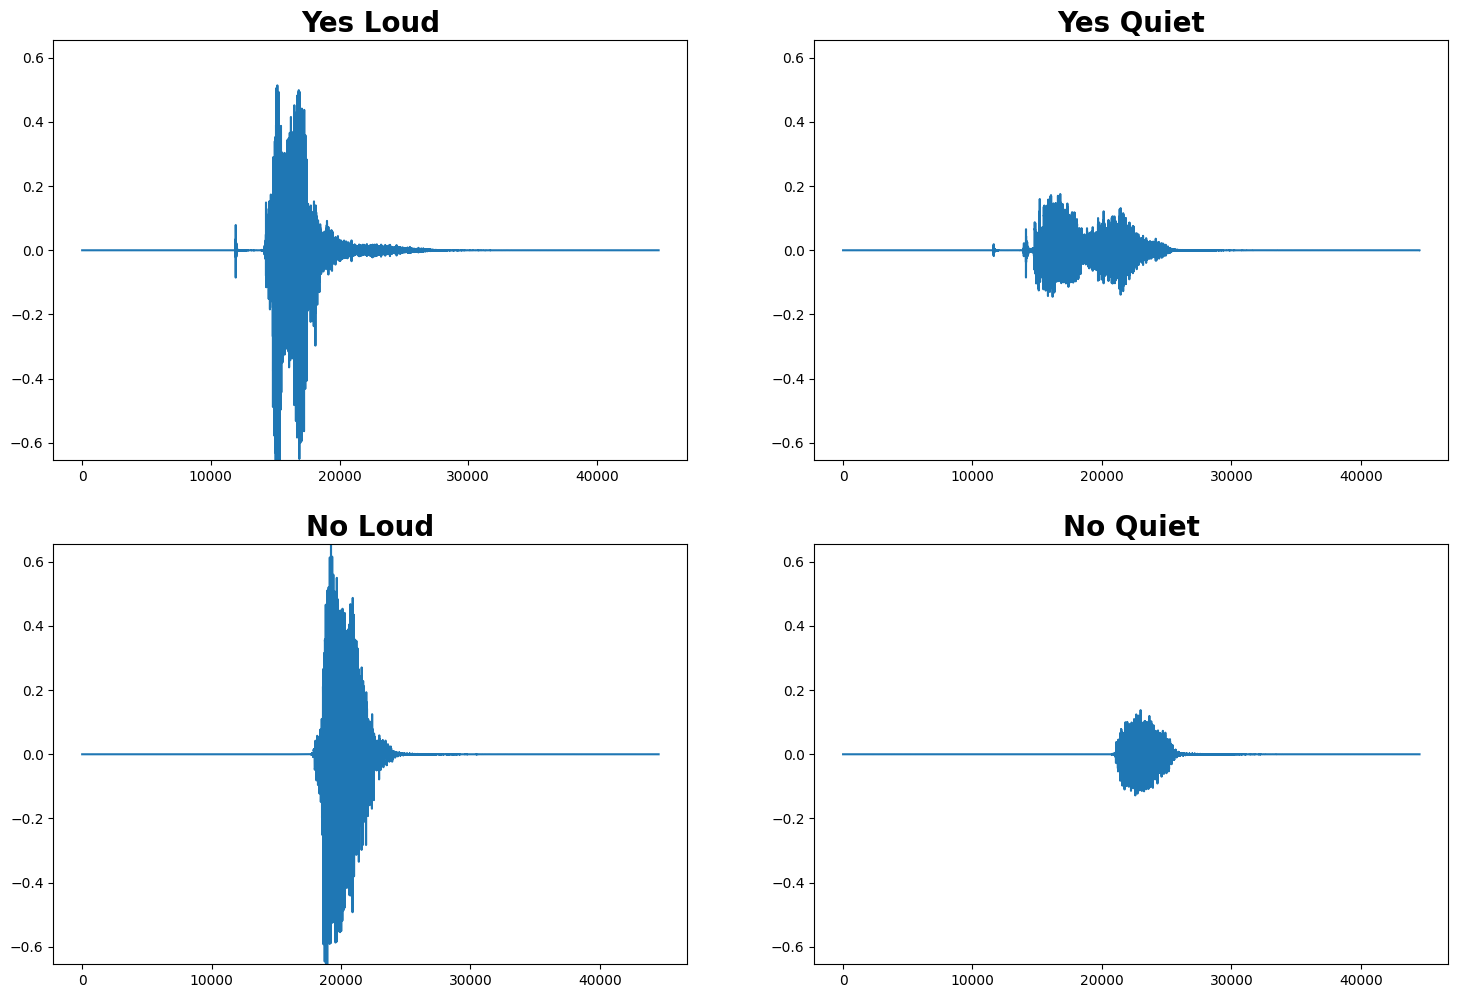

In [24]:
# Plot the figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# Lista de todos los arrays
arrays = [yes_loud_array, yes_quiet_array, no_loud_array, no_quiet_array]

# Combina todos los arrays en uno
combined_array = np.concatenate(arrays)

# Encuentra el valor máximo en el array combinado
max_val = max(combined_array)

ax1.plot(yes_loud_array)
ax1.set_title("Yes Loud", {'fontsize':20, 'fontweight':'bold'})
ax1.set_ylim(-max_val, max_val)

ax2.plot(yes_quiet_array)
ax2.set_title("Yes Quiet", {'fontsize':20, 'fontweight':'bold'})
ax2.set_ylim(-max_val, max_val)

ax3.plot(no_loud_array)
ax3.set_title("No Loud", {'fontsize':20, 'fontweight':'bold'})
ax3.set_ylim(-max_val, max_val)

ax4.plot(no_quiet_array)
ax4.set_title("No Quiet", {'fontsize':20, 'fontweight':'bold'})
ax4.set_ylim(-max_val, max_val)

fig.set_size_inches(18,12)

### Aplicación de la Transformada de Fourier a las señales
*Adapted from  [MakersPortal: Audio Processing In Python](https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform)*

Computamos la FFT en las señales, tomando solo un lado del espectro y removiendo su parte imaginaria.


In [15]:

#Calcula la transformada rápida de Fourier de la señales y remueve la parte imaginaria 
ft_audio_yes_loud = np.abs(2*np.fft.fft(yes_loud_array))
ft_audio_yes_quiet = np.abs(2*np.fft.fft(yes_quiet_array))
ft_audio_no_loud = np.abs(2*np.fft.fft(no_loud_array))
ft_audio_no_quiet = np.abs(2*np.fft.fft(no_quiet_array))

### Imprimir la relación de Amplitud en relación a la Frecuencia en HZ

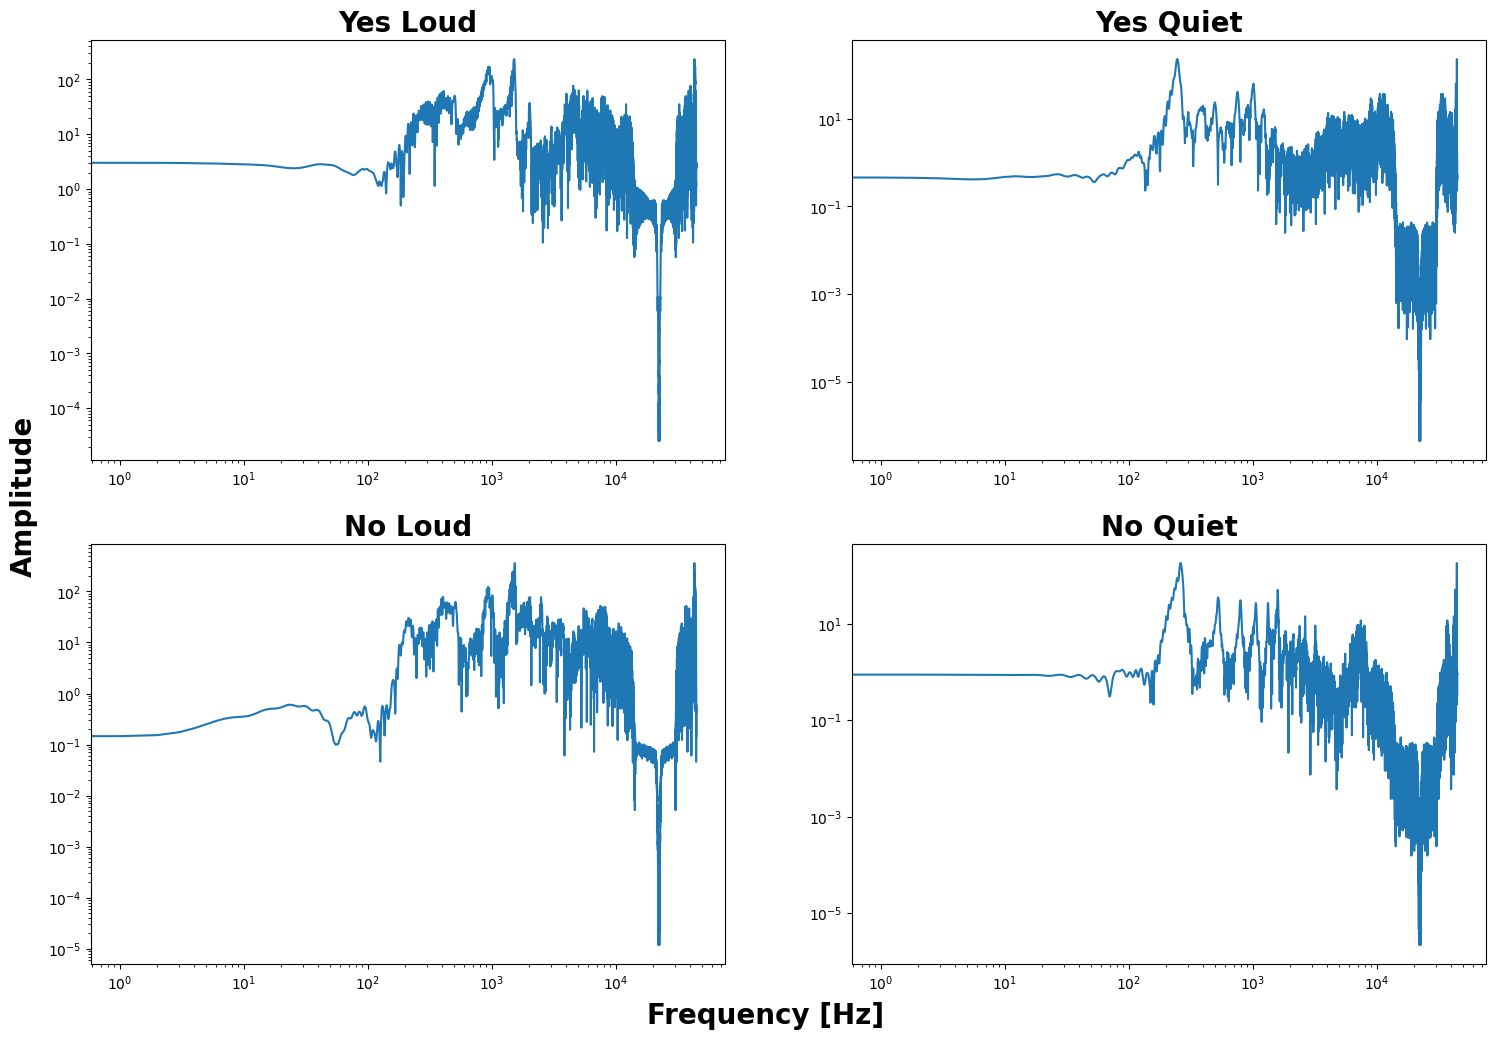

In [16]:
# Agregamos cada una de las señales al plot vacío
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# Le damos un valor a cada uno de los Plots y los escalamos
ax1.plot(ft_audio_yes_loud)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title("Yes Loud", {'fontsize':20, 'fontweight':'bold'})

ax2.plot(ft_audio_yes_quiet)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title("Yes Quiet", {'fontsize':20, 'fontweight':'bold'})

ax3.plot(ft_audio_no_loud)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title("No Loud", {'fontsize':20, 'fontweight':'bold'})

ax4.plot(ft_audio_no_quiet)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_title("No Quiet", {'fontsize':20, 'fontweight':'bold'})

fig.set_size_inches(18,12)
fig.text(0.5, 0.06, 'Frequency [Hz]', {'fontsize':20, 'fontweight':'bold'}, ha='center');
fig.text(0.08, 0.5, 'Amplitude', {'fontsize':20, 'fontweight':'bold'}, va='center', rotation='vertical');

### Espectrogramas

In [17]:
import tensorflow_io as tfio

In [18]:
# Convert to spectrogram and display
# adapted from https://aruno14.medium.com/comparaison-of-audio-representation-in-tensorflow-b6c33a83d77f
spectrogram_yes_loud = tfio.audio.spectrogram(yes_loud_array/1.0, nfft=2048, window=len(yes_loud_array), stride=int(sr_yes_loud * 0.008))
spectrogram_yes_quiet = tfio.audio.spectrogram(yes_quiet_array/1.0, nfft=2048, window=len(yes_quiet_array), stride=int(sr_yes_quiet * 0.008))
spectrogram_no_loud = tfio.audio.spectrogram(no_loud_array/1.0, nfft=2048, window=len(no_loud_array), stride=int(sr_no_loud * 0.008))
spectrogram_no_quiet = tfio.audio.spectrogram(no_quiet_array/1.0, nfft=2048, window=len(no_quiet_array), stride=int(sr_no_quiet * 0.008))

2023-09-18 17:36:33.931191: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45696000 exceeds 10% of free system memory.
2023-09-18 17:36:34.009182: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45696000 exceeds 10% of free system memory.
2023-09-18 17:36:34.070196: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45256704 exceeds 10% of free system memory.
2023-09-18 17:36:34.085768: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45256704 exceeds 10% of free system memory.
2023-09-18 17:36:34.118488: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 45256704 exceeds 10% of free system memory.


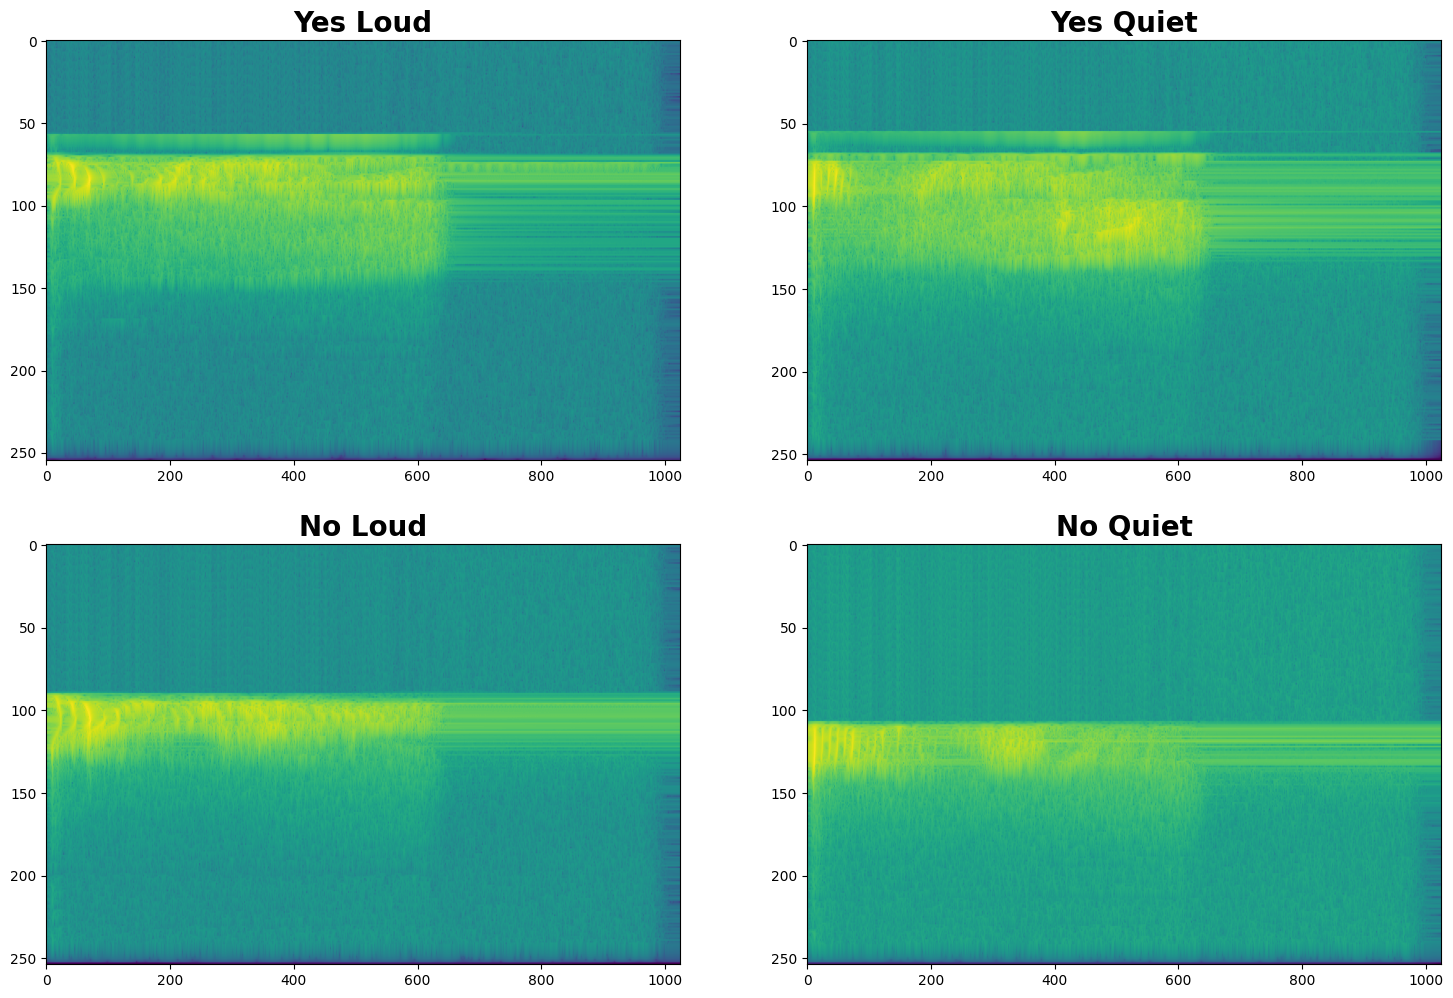

In [19]:
# Plot the figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.imshow(tf.math.log(spectrogram_yes_loud).numpy(), aspect='auto')
ax1.set_title("Yes Loud", {'fontsize':20, 'fontweight':'bold'})

ax2.imshow(tf.math.log(spectrogram_yes_quiet).numpy(), aspect='auto')
ax2.set_title("Yes Quiet", {'fontsize':20, 'fontweight':'bold'})

ax3.imshow(tf.math.log(spectrogram_no_loud).numpy(), aspect='auto')
ax3.set_title("No Loud", {'fontsize':20, 'fontweight':'bold'})

ax4.imshow(tf.math.log(spectrogram_no_quiet).numpy(), aspect='auto')
ax4.set_title("No Quiet", {'fontsize':20, 'fontweight':'bold'})

fig.set_size_inches(18,12)

### MFCCs

In [20]:
# Convert to MFCC using the Mel Scale
# adapted from: https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0
mfcc_yes_loud = librosa.power_to_db(librosa.feature.melspectrogram(
    y=np.float32(yes_loud_array), sr=sr_yes_loud, n_fft=2048, hop_length=512, n_mels=128), ref=np.max)

mfcc_yes_quiet = librosa.power_to_db(librosa.feature.melspectrogram(
    y=np.float32(yes_quiet_array), sr=sr_yes_quiet, n_fft=2048, hop_length=512, n_mels=128), ref=np.max)

mfcc_no_loud = librosa.power_to_db(librosa.feature.melspectrogram(
    y=np.float32(no_loud_array), sr=sr_no_loud, n_fft=2048, hop_length=512, n_mels=128), ref=np.max)

mfcc_no_quiet = librosa.power_to_db(librosa.feature.melspectrogram(
    y=np.float32(no_quiet_array), sr=sr_no_quiet, n_fft=2048, hop_length=512, n_mels=128), ref=np.max)

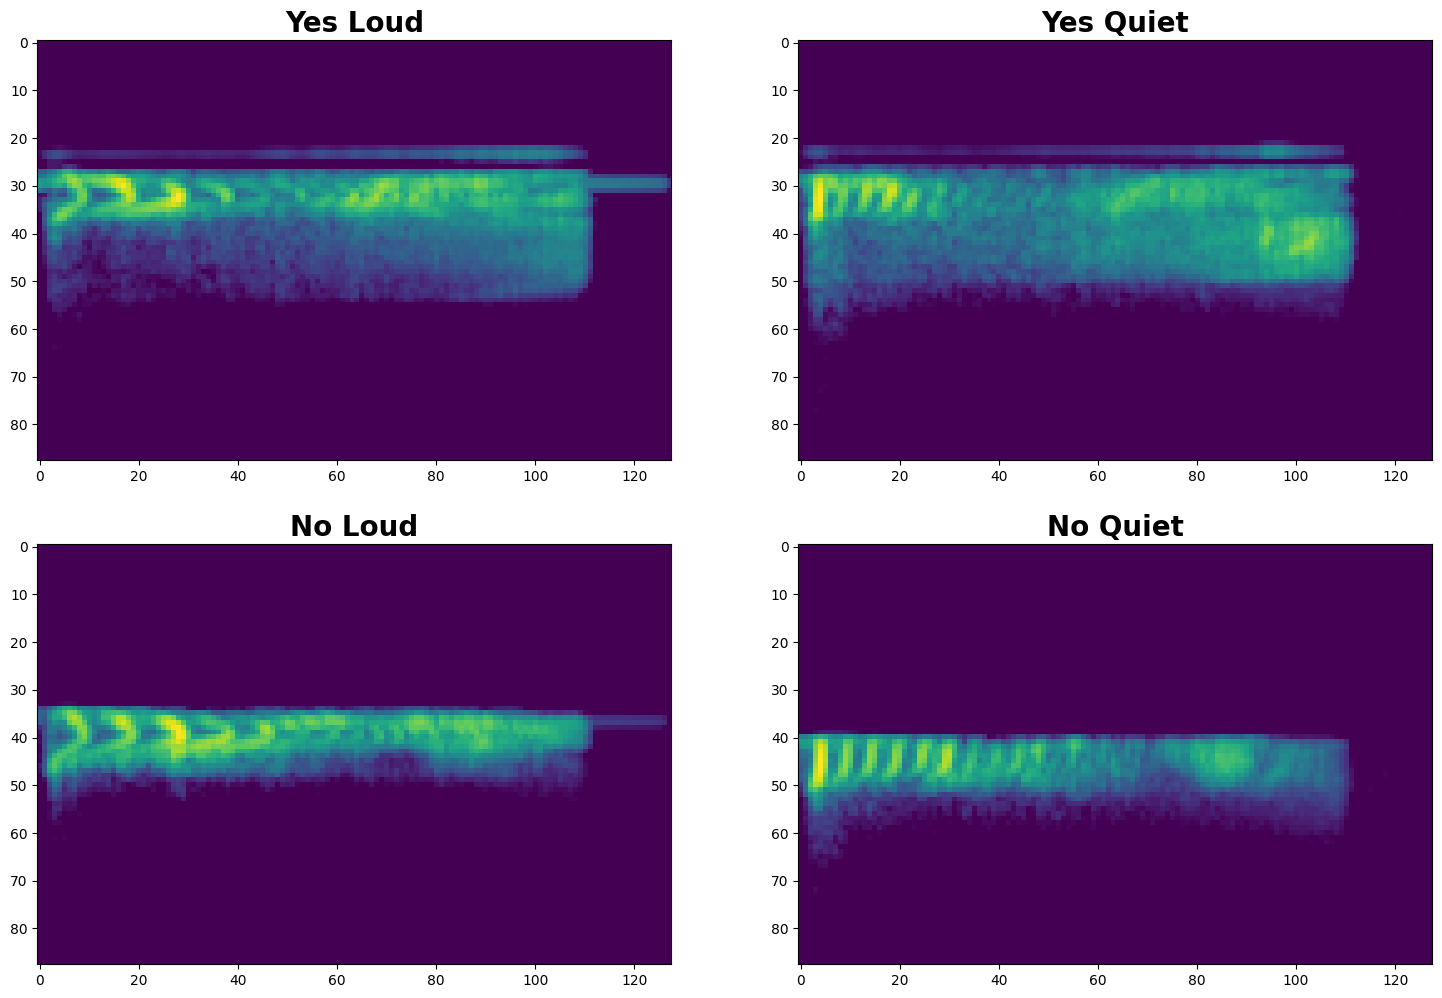

In [21]:
# Plot the figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.imshow(np.swapaxes(mfcc_yes_loud, 0 ,1), interpolation='nearest', cmap=cm.viridis, origin='lower', aspect='auto')
ax1.set_title("Yes Loud", {'fontsize':20, 'fontweight':'bold'})
ax1.set_ylim(ax1.get_ylim()[::-1])

ax2.imshow(np.swapaxes(mfcc_yes_quiet, 0 ,1), interpolation='nearest', cmap=cm.viridis, origin='lower', aspect='auto')
ax2.set_title("Yes Quiet", {'fontsize':20, 'fontweight':'bold'})
ax2.set_ylim(ax2.get_ylim()[::-1])

ax3.imshow(np.swapaxes(mfcc_no_loud, 0 ,1), interpolation='nearest', cmap=cm.viridis, origin='lower', aspect='auto')
ax3.set_title("No Loud", {'fontsize':20, 'fontweight':'bold'})
ax3.set_ylim(ax3.get_ylim()[::-1])

ax4.imshow(np.swapaxes(mfcc_no_quiet, 0 ,1), interpolation='nearest', cmap=cm.viridis, origin='lower', aspect='auto')
ax4.set_title("No Quiet", {'fontsize':20, 'fontweight':'bold'})
ax4.set_ylim(ax4.get_ylim()[::-1])

fig.set_size_inches(18,12)